In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## lagrange函数

In [11]:
from scipy.interpolate import lagrange
x = [4990, 4991, 4992, 4993, 4994, 4996, 4997, 4998, 4999]
y = [4.8, 4.8, 9.6, 4.8, 4.8, 1.8, 4.8, 4.8, 2.8]
print(lagrange(x,y))
print(type(lagrange(x,y)))
# 的输出值为的是多项式的n个系数
# 这里输出3个值，分别为a0,a1,a2
# y = a0 * x**2 + a1 * x + a2 → y = -0.11111111 * x**2 + 0.33333333 * x + 10
print('插值4995为：%.2f' % lagrange(x,y)(4995))

          8         7             6             5             4
0.002101 x - 83.95 x + 1.468e+06 x - 1.466e+10 x + 9.152e+13 x
              3             2
 - 3.657e+17 x + 9.132e+20 x - 1.303e+24 x + 8.136e+26
<class 'numpy.poly1d'>
插值4995为：6734508720128.00


In [12]:
data = pd.Series(np.random.rand(100)*100)
data[[3, 6, 33, 56, 45, 66, 67, 80, 90]] = np.nan
print('总数据量:%i' % len(data))
data_na = data[data.isnull()]
print('缺失值数据量:%i' % len(data_na))
print('缺失数据占比:%.2f%%' % (len(data_na) / len(data) * 100))

总数据量:100
缺失值数据量:9
缺失数据占比:9.00%


## lagrange插值的应用

43.70236031782166
76.36062334190024
71.33244323730469
23.19140625
27.3359375
196.99609375
140.265625
17.0
-18.0
finished!


c:\Program Files\Python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Program Files\Python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 25454 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Program Files\Python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 20998 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Program Files\Python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 24067 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Program Files\Python39\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\Program Files\Python39\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 25454 missing fr

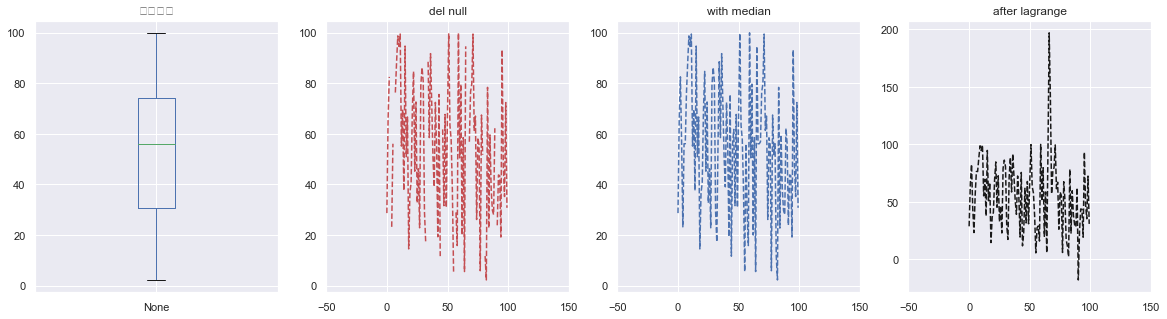

In [13]:
data_c = data.fillna(data.median())         # 中位数填充缺失值

fig,axes = plt.subplots(1,4,figsize = (20,5))

data.plot.box(ax=axes[0], grid=True, title='数据分布')
data.plot(kind='line', style='--r', ax=axes[1], grid=True, title='del null', xlim=[-50, 150])
data_c.plot(kind='line', style='--b', ax=axes[2], grid=True, title='with median', xlim=[-50, 150])

def na_c(s, n, k=5):
    y = s.reindex(list(range(n-k, n+1+k)))  # 取数
    y = y[y.notnull()]                      # 剔除空值
    return(lagrange(y.index, list(y))(n))


na_re = []
for i in range(len(data)):
    if data.isnull()[i]:
        tmp = na_c(data, i)
        data[i] = tmp
        na_re.append(tmp)
        print(tmp)
        
data.dropna(inplace=True)  # 清除插值后仍存在的缺失值
data.plot(kind='line', style='--k', ax=axes[3], grid=True, title='after lagrange', xlim=[-50, 150])
print('finished!')
# 缺失值插值

plt.show()

## 模板
原理：用每个缺失值周围的数对缺失值插值

In [14]:
# k为取前后的数据个数，默认为5
from scipy.interpolate import lagrange  

def ployinterp_column(s, n, k=5): 
    y = s.reindex(list(range(n-k, n)) + list(range(n+1, n+1+k)))    # 取数
    y = y[y.notnull()]                                              # 剔除空值
    return lagrange(y.index, list(y))(n)                            # 插值并返回插值结果

def data_lagrange(data):  
    for i in data.columns:  
        for j in range(len(data)):
            if (data[i].isnull())[j]:                   
                data.loc[j,i] = ployinterp_column(data[i], j)
    return data
    data.dropna(inplace=True)                                       # 清除插值后仍存在的缺失值
data_lagrange(data)

AttributeError: 'Series' object has no attribute 'columns'